# Data Cleaning and Preparation



During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks are often reported to take up 80% or more of an analyst’s time. Sometimes the way that data is stored in files or databases is not in the right format for a particular task. Many researchers choose to do ad hoc processing of data from one form to another using a general-purpose programming language, like Python, Perl, R, or Java, or Unix text-processing tools like sed or awk. Fortunately, pandas, along with the built-in Python language features, provides you with a high-level, flexible, and fast set of tools to enable you to manipulate data into the right form.

In this week, we will discuss tools for missing data, duplicate data, string manipulation, and some other analytical data transformations. In the next week, we will focus on combining and rearranging datasets in various ways.


# Table of Contents

- 1.1  **[Filtering Out Missing Data](#Filtering_out_missing_data)**
   
- 1.2  **[Filling In Missing Data](#Filtering_in_missing_data)**


In [1]:
import pandas as pd
import numpy as np


## Part 1: Handling Missing Data

Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, **pandas uses the floating-point value `NaN` (Not a Number) to represent missing data.** We call this a *sentinel value* that can be easily detected:

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [3]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In pandas, we’ve adopted a convention used in the R programming language by referring to missing data as NA, which stands for *not available*. **In statistics applications, NA data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example).** When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

The built-in Python `None` value is also treated as `NA` in object arrays:

In [5]:
string_data[0] = None 

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

There is work ongoing in the pandas project to improve the internal details of how missing data is handled, but the user API functions, like pandas.isnull, abstract away many of the annoying details. See Table 7-1 for a list of some functions related to missing data handling.

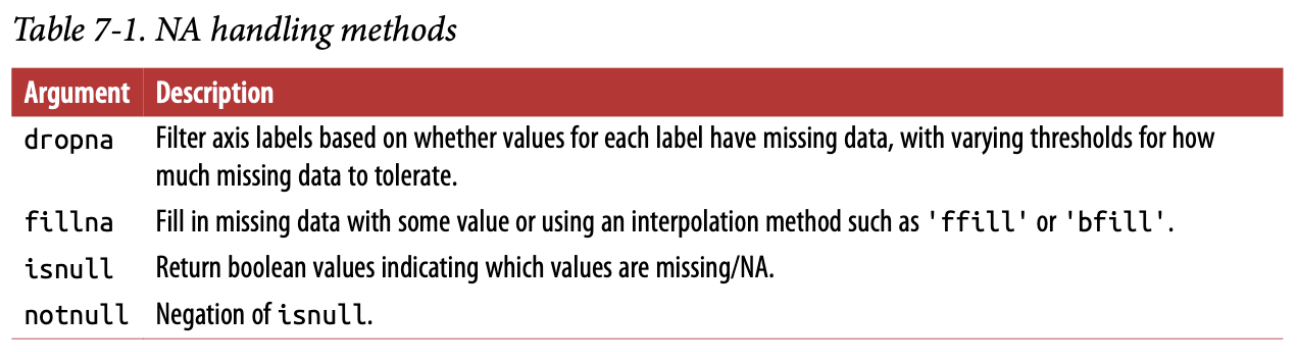

<a id="Filtering_out_missing_data"></a>
## 1.1 Filtering Out Missing Data

There are a few ways to filter out missing data. While you always have the option to do it by hand using `pandas.isnull` and boolean indexing, the `dropna` can be helpful. On a Series, it returns the Series with only the non-null data and index values:

In [7]:
from numpy import nan as NA

In [13]:
# data = pd.Series([1, NA, 3.5, NA, 7])
data = pd.Series([1, None, 3.5, None, 7])

In [14]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [15]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

This is equivalent to:

In [16]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex. You may want to drop rows or columns that are all NA or only those containing any NAs. `dropna` by default drops any row containing a missing value:

In [17]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                    [NA, NA, NA], [NA, 6.5, 3.]])

In [18]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [19]:
cleaned = data.dropna()

In [20]:
cleaned

,0,1,2
0,1.0,6.5,3.0


**Passing `how='all'` will only drop rows that are all NA:**

In [21]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass `axis=1`:

In [22]:
data[4] = NA

In [23]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [24]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data. Suppose you want to keep only rows containing a certain number of observations. You can indicate this with the `thresh` argument:

In [50]:
df = pd.DataFrame(np.random.randn(7, 3))

In [51]:
df

,0,1,2
0,0.465459,-0.648830,0.553330
1,-1.440039,-0.319505,0.086929
2,-3.023558,0.788489,0.661491
3,0.540292,-0.032170,1.233247
4,-1.359037,-2.266388,0.828412
5,0.497294,-1.359122,0.004384
6,0.573695,-0.109387,-0.661144


In [52]:
df.iloc[:4, 1] = NA

In [53]:
df

,0,1,2
0,0.465459,NaN,0.553330
1,-1.440039,NaN,0.086929
2,-3.023558,NaN,0.661491
3,0.540292,NaN,1.233247
4,-1.359037,-2.266388,0.828412
5,0.497294,-1.359122,0.004384
6,0.573695,-0.109387,-0.661144


In [29]:
df.iloc[:2, 2] = NA

In [30]:
df

,0,1,2
0,0.069000,NaN,NaN
1,-0.981547,NaN,NaN
2,-1.382459,NaN,2.182248
3,0.805403,NaN,-0.345025
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


In [31]:
df.dropna()

,0,1,2
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


In [43]:
df.dropna(thresh=2,axis=0)

,0,1,2
2,-1.382459,NaN,2.182248
3,0.805403,NaN,-0.345025
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


<a id="Filtering_in_missing_data"></a>
## 1.2  Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the `fillna` method is the workhorse function to use. Calling `fillna` with a constant replaces missing values with that value:

In [49]:
df

,0,1,2
0,0.069000,0.000000,0.000000
1,-0.981547,0.000000,0.000000
2,-1.382459,0.000000,2.182248
3,0.805403,0.000000,-0.345025
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


In [45]:
df.fillna(0)

,0,1,2
0,0.069000,0.000000,0.000000
1,-0.981547,0.000000,0.000000
2,-1.382459,0.000000,2.182248
3,0.805403,0.000000,-0.345025
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


Calling `fillna` with a dict, you can use a different fill value for each column:

In [46]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.069000,0.500000,0.000000
1,-0.981547,0.500000,0.000000
2,-1.382459,0.500000,2.182248
3,0.805403,0.500000,-0.345025
4,1.775683,2.287009,-3.070791
5,-2.637464,-0.172222,0.719845
6,0.809122,-0.690536,0.606043


`fillna` returns a new object, but you can modify the existing object in-place: 

In [55]:
# _ = df.fillna(0, inplace=True) 
df.fillna(0, inplace=True) 

In [56]:
df

,0,1,2
0,0.465459,0.000000,0.553330
1,-1.440039,0.000000,0.086929
2,-3.023558,0.000000,0.661491
3,0.540292,0.000000,1.233247
4,-1.359037,-2.266388,0.828412
5,0.497294,-1.359122,0.004384
6,0.573695,-0.109387,-0.661144


The same interpolation methods available for reindexing can be used with `fillna`:

In [57]:
df = pd.DataFrame(np.random.randn(6, 3))

In [58]:
df

,0,1,2
0,0.442599,-0.354440,-0.737833
1,-0.395106,1.124478,-0.363289
2,0.014499,-0.113438,1.230504
3,-0.965020,1.399896,-0.707724
4,0.490343,-0.379910,0.756520
5,-0.632710,-0.043582,-0.297528


In [59]:
df.iloc[2:, 1] = NA
df

,0,1,2
0,0.442599,-0.354440,-0.737833
1,-0.395106,1.124478,-0.363289
2,0.014499,NaN,1.230504
3,-0.965020,NaN,-0.707724
4,0.490343,NaN,0.756520
5,-0.632710,NaN,-0.297528


In [60]:
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.442599,-0.354440,-0.737833
1,-0.395106,1.124478,-0.363289
2,0.014499,NaN,1.230504
3,-0.965020,NaN,-0.707724
4,0.490343,NaN,NaN
5,-0.632710,NaN,NaN


In [61]:
df.fillna(method='ffill') 

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_35670/3524271710.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,0.442599,-0.354440,-0.737833
1,-0.395106,1.124478,-0.363289
2,0.014499,1.124478,1.230504
3,-0.965020,1.124478,-0.707724
4,0.490343,1.124478,-0.707724
5,-0.632710,1.124478,-0.707724


In [62]:
df.fillna(method='ffill', limit=2)

/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_35670/2719175769.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=2)


,0,1,2
0,0.442599,-0.354440,-0.737833
1,-0.395106,1.124478,-0.363289
2,0.014499,1.124478,1.230504
3,-0.965020,1.124478,-0.707724
4,0.490343,NaN,-0.707724
5,-0.632710,NaN,-0.707724



With `fillna` you can do lots of other things with a little creativity. For example, you might pass the mean or median value of a Series:

In [63]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [64]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [65]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

See Table 7-2 for a reference on `fillna`.

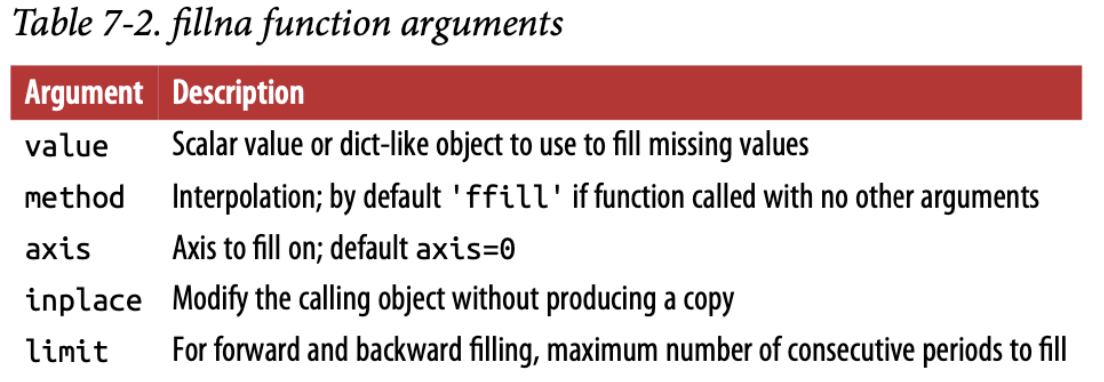

Let's now create a simple real-life-like dataset to see how we handle missing values.

In [66]:
# Create a fictional "Student Scores" dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace'],
    'Math_Score': [85, 90, None, 78, 95, 102, 89],  # Note: Score 102 is an invalid value
    'English_Score': [88, None, 80, 76, None, 88, 92],
    'History_Score': [80, None, 78, None, 89, 90, 91]
}

# Convert the data dictionary into a DataFrame
student_scores = pd.DataFrame(data)

# Display the initial dataset
student_scores

,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.0,88.0,80.0
1,102,Bob,90.0,NaN,NaN
2,103,Charlie,NaN,80.0,78.0
3,104,David,78.0,76.0,NaN
4,105,Eva,95.0,NaN,89.0
5,106,Frank,102.0,88.0,90.0
6,107,Grace,89.0,92.0,91.0


Check the number of missing values in each column of the dataset

In [67]:

missing_values_count = student_scores.isnull().sum()

missing_values_count


Student_ID       0
Name             0
Math_Score       1
English_Score    2
History_Score    2
dtype: int64

Show all rows where the 'Math_Score' column has a value of 'NA'

In [68]:
# Display all rows where the 'Math_Score' column is null 
student_scores[student_scores['Math_Score'].isnull()]


,Student_ID,Name,Math_Score,English_Score,History_Score
2,103,Charlie,NaN,80.0,78.0


Show all rows where either the 'English_Score' column or the 'History_Score' column has a value of 'NA'

In [69]:

missing_values_condition = student_scores['English_Score'].isnull() | student_scores['History_Score'].isnull()
print(missing_values_condition)
rows_with_missing_values = student_scores[missing_values_condition]
rows_with_missing_values


0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool


,Student_ID,Name,Math_Score,English_Score,History_Score
1,102,Bob,90.0,NaN,NaN
3,104,David,78.0,76.0,NaN
4,105,Eva,95.0,NaN,89.0


Display and show how many entries in the dataset have no missing value (NA) in all 'Math_Score', 'English_Score', and 'History_Score' columns.

In [70]:
no_missing_values_condition = ~(student_scores['Math_Score'].isnull() | 
                                student_scores['English_Score'].isnull() | 
                                student_scores['History_Score'].isnull())

student_scores[no_missing_values_condition]

,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.0,88.0,80.0
5,106,Frank,102.0,88.0,90.0
6,107,Grace,89.0,92.0,91.0


Create a new DataFrame, without modifying the original, and fill missing values for 'Math_Score' with its mean value

In [71]:
filled_student_scores = student_scores.fillna({'Math_Score': student_scores['Math_Score'].mean()})


filled_student_scores


,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.000000,88.0,80.0
1,102,Bob,90.000000,NaN,NaN
2,103,Charlie,89.833333,80.0,78.0
3,104,David,78.000000,76.0,NaN
4,105,Eva,95.000000,NaN,89.0
5,106,Frank,102.000000,88.0,90.0
6,107,Grace,89.000000,92.0,91.0


Create a new DataFrame, without modifying the original, and drop rows where 'History_Score' has missing values

In [72]:
dropped_student_scores = student_scores.dropna(subset=['History_Score'])


dropped_student_scores


,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.0,88.0,80.0
2,103,Charlie,NaN,80.0,78.0
4,105,Eva,95.0,NaN,89.0
5,106,Frank,102.0,88.0,90.0
6,107,Grace,89.0,92.0,91.0


Create a new DataFrame, without modifying the original, and replace all missing values with the median of their respective columns

In [73]:
median_filled_student_scores = student_scores.fillna({
    'Math_Score': student_scores['Math_Score'].median(),
    'English_Score': student_scores['English_Score'].median(),
    'History_Score': student_scores['History_Score'].median()
})


median_filled_student_scores


,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.0,88.0,80.0
1,102,Bob,90.0,88.0,89.0
2,103,Charlie,89.5,80.0,78.0
3,104,David,78.0,76.0,89.0
4,105,Eva,95.0,88.0,89.0
5,106,Frank,102.0,88.0,90.0
6,107,Grace,89.0,92.0,91.0


Create a new DataFrame, without modifying the original, and fill the missing values using the forward fill method 

In [74]:
ffill_student_scores = student_scores.fillna(method='ffill')


ffill_student_scores


/var/folders/t6/jzgwrdks2vq53w20jlljrk840000gn/T/ipykernel_35670/3415333689.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_student_scores = student_scores.fillna(method='ffill')


,Student_ID,Name,Math_Score,English_Score,History_Score
0,101,Alice,85.0,88.0,80.0
1,102,Bob,90.0,88.0,80.0
2,103,Charlie,90.0,80.0,78.0
3,104,David,78.0,76.0,78.0
4,105,Eva,95.0,76.0,89.0
5,106,Frank,102.0,88.0,90.0
6,107,Grace,89.0,92.0,91.0
